Q1. Write python functions to create the following visualizations. In all cases, please use the wines data set (with all data of red and white wines in a data frame).
(a) Parameters residual sugar and alcohol have a slightly negative correlation. Make a scatter plot to show the pairwise distribution of these two attributes, with each point illustrated by a circle that is yellow (for white wine) or red (for red wine).

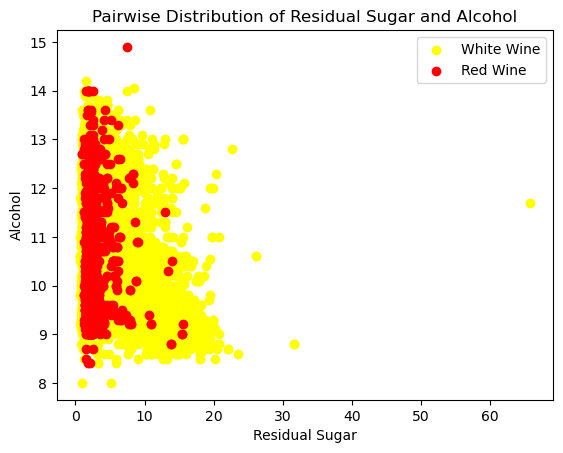

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the white wine CSV file into a DataFrame
white_wine_df = pd.read_csv('/Users/daphne/Downloads/winequality-white.csv', sep=';')

# Load the red wine CSV file into a DataFrame
red_wine_df = pd.read_csv('/Users/daphne/Downloads/winequality-red.csv', sep=';')

# Create a scatter plot
plt.scatter(white_wine_df['residual sugar'], white_wine_df['alcohol'], color='yellow', label='White Wine')
plt.scatter(red_wine_df['residual sugar'], red_wine_df['alcohol'], color='red', label='Red Wine')

# Set the plot title and axis labels
plt.title('Pairwise Distribution of Residual Sugar and Alcohol')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')

# Add a legend
plt.legend()

# Display the plot
plt.show()

(b) Suppose we wish to examine the extent of this relationship for low, medium or high quality wines separately. Make a visualization with separate scatterplots of these three categories plotted side by side in a single row.

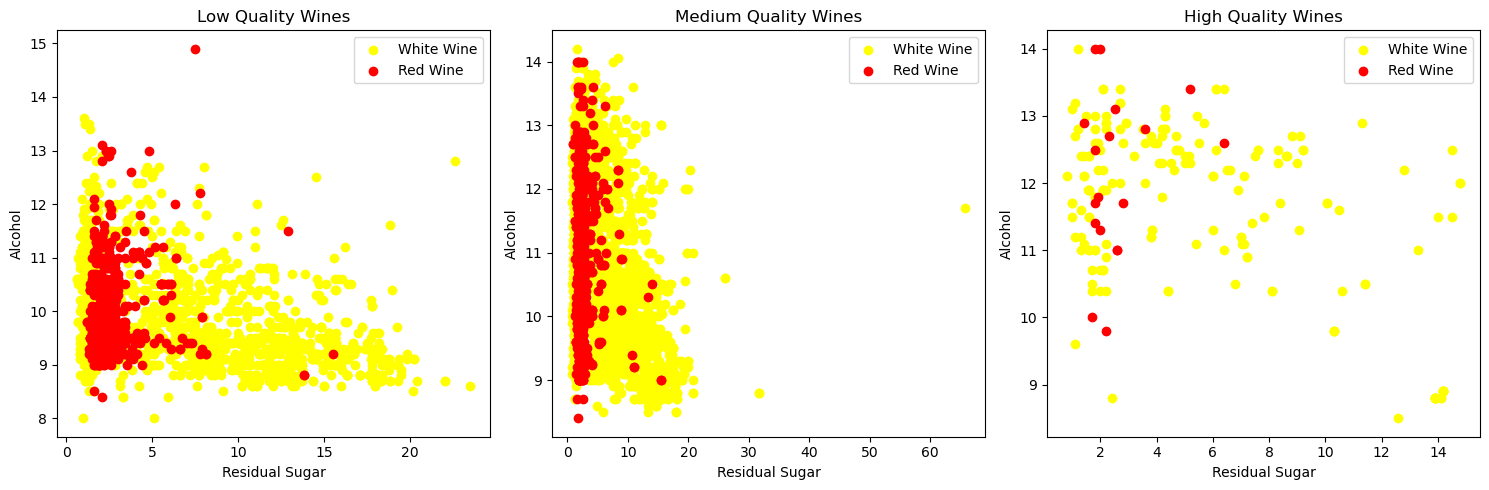

In [56]:
# Filter white wine data by quality
low_quality_white = white_wine_df[white_wine_df['quality'] <= 5]
medium_quality_white = white_wine_df[(white_wine_df['quality'] > 5) & (white_wine_df['quality'] <= 7)]
high_quality_white = white_wine_df[white_wine_df['quality'] > 7]

# Filter red wine data by quality
low_quality_red = red_wine_df[red_wine_df['quality'] <= 5]
medium_quality_red = red_wine_df[(red_wine_df['quality'] > 5) & (red_wine_df['quality'] <= 7)]
high_quality_red = red_wine_df[red_wine_df['quality'] > 7]

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot scatterplot for low-quality wines
axs[0].scatter(low_quality_white['residual sugar'], low_quality_white['alcohol'], color='yellow', label='White Wine')
axs[0].scatter(low_quality_red['residual sugar'], low_quality_red['alcohol'], color='red', label='Red Wine')
axs[0].set_title('Low Quality Wines')
axs[0].set_xlabel('Residual Sugar')
axs[0].set_ylabel('Alcohol')

# Plot scatterplot for medium-quality wines
axs[1].scatter(medium_quality_white['residual sugar'], medium_quality_white['alcohol'], color='yellow', label='White Wine')
axs[1].scatter(medium_quality_red['residual sugar'], medium_quality_red['alcohol'], color='red', label='Red Wine')
axs[1].set_title('Medium Quality Wines')
axs[1].set_xlabel('Residual Sugar')
axs[1].set_ylabel('Alcohol')

# Plot scatterplot for high-quality wines
axs[2].scatter(high_quality_white['residual sugar'], high_quality_white['alcohol'], color='yellow', label='White Wine')
axs[2].scatter(high_quality_red['residual sugar'], high_quality_red['alcohol'], color='red', label='Red Wine')
axs[2].set_title('High Quality Wines')
axs[2].set_xlabel('Residual Sugar')
axs[2].set_ylabel('Alcohol')

# Add a legend to the plots
for ax in axs:
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

(c) Suppose we wish to examine the distribution of the total sulphur dioxide in white wines. Plot the histogram of the total sulphur dioxide in all the white wines. Comment whether it looks close to a Gaussian distribution. Now use the distfit function (from the distfit library) to find the best fitting Normal distribution and plot the histogram together with the best fitting Normal distribution pdf (https://erdogant.github.io/distfit/pages/html/Performance.html).

In [3]:
pip install distfit

Note: you may need to restart the kernel to use updated packages.


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 2.61793e-05] [loc=138.361 scale=42.494]


{'name': 'norm', 'score': 2.6179280595825598e-05, 'loc': 138.36065741118824, 'scale': 42.49372602475034, 'arg': (), 'params': (138.36065741118824, 42.49372602475034), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x137cda6d0>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': 68.46469803669545, 'CII_max_alpha': 208.256616785681}


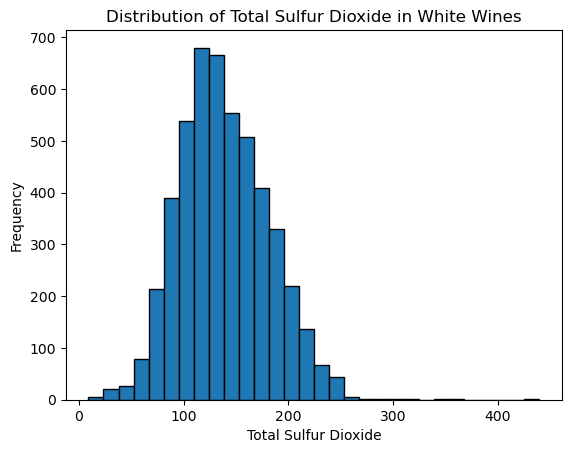

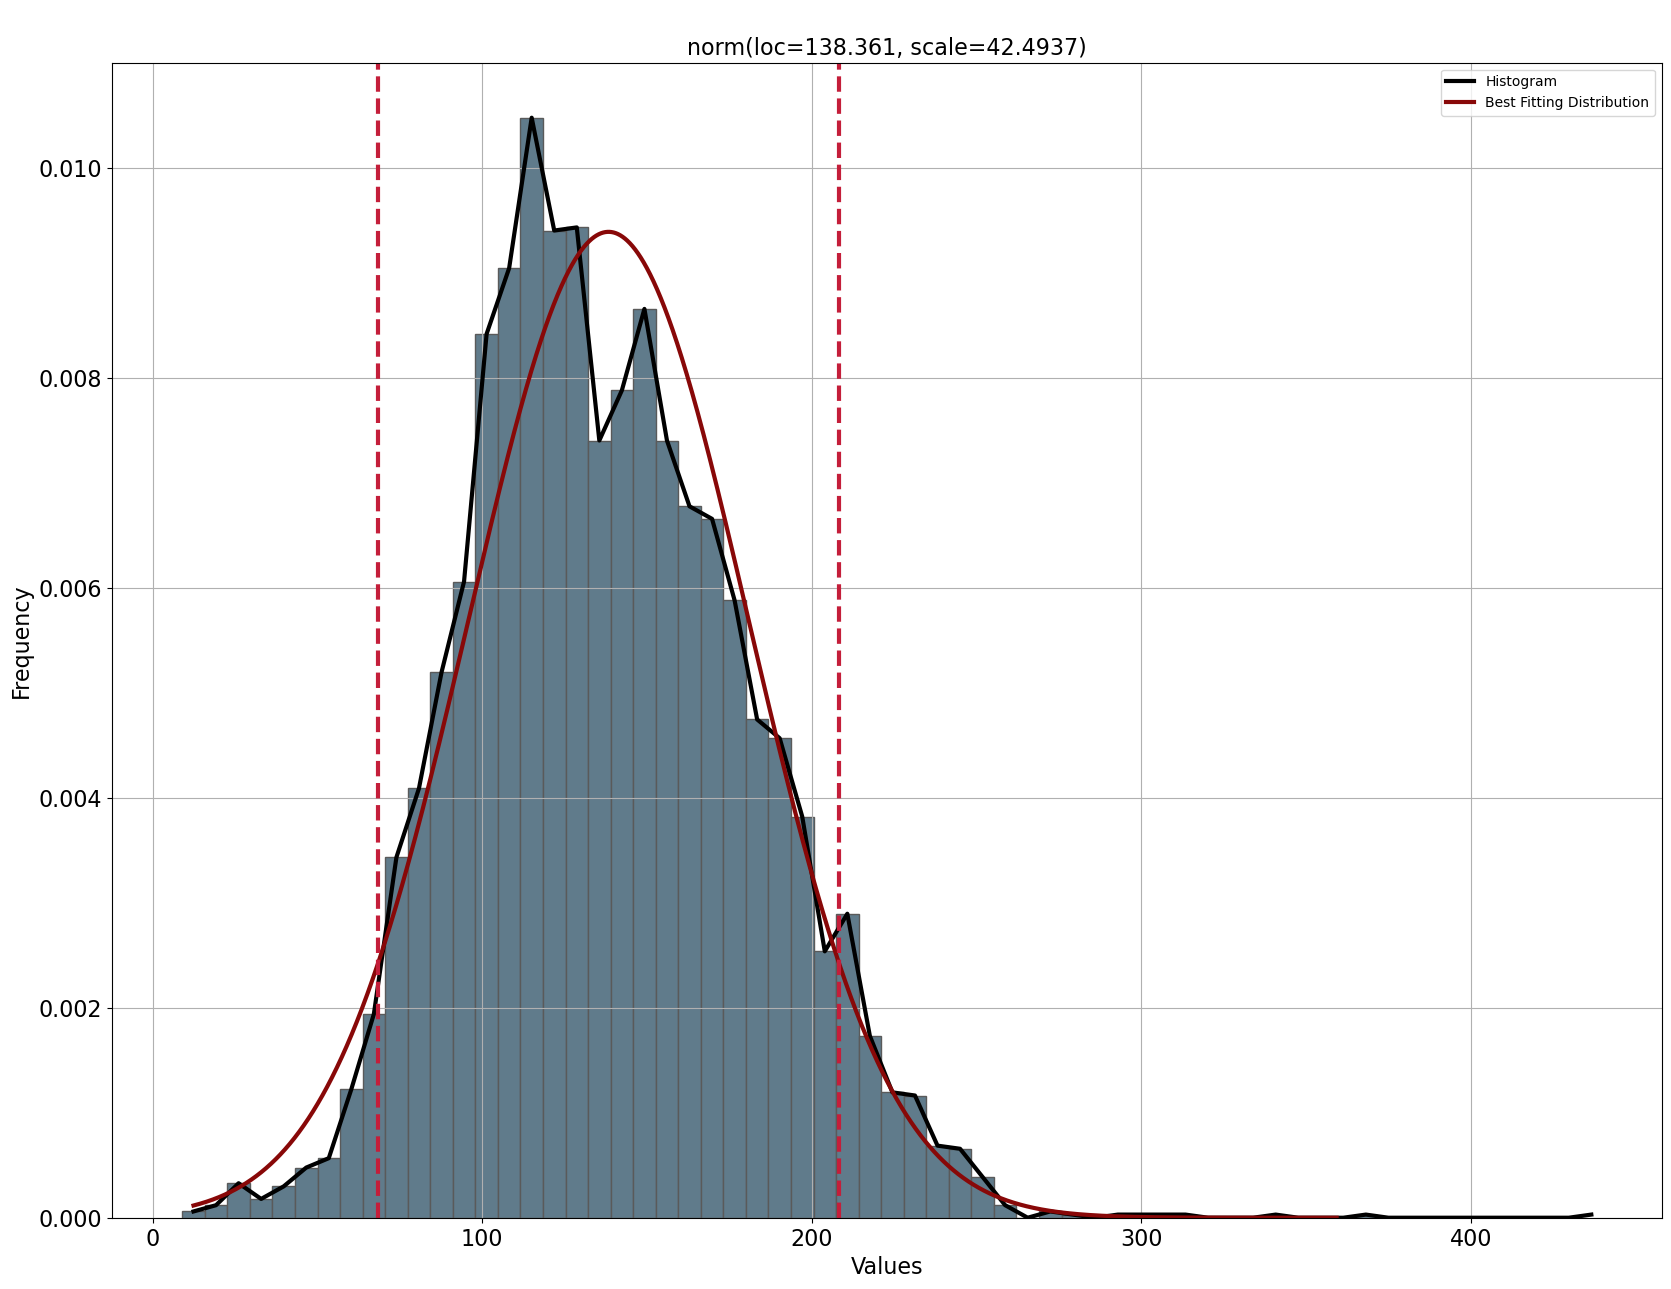

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from distfit import distfit

# Load the white wine CSV file into a DataFrame
white_wine_df = pd.read_csv('/Users/daphne/Downloads/winequality-white.csv', sep=';')

# Extract the total sulfur dioxide column from white wine DataFrame
total_sulfur_dioxide = white_wine_df['total sulfur dioxide']

# Create a histogram
plt.hist(total_sulfur_dioxide, bins=30, edgecolor='black')

# Set the plot title and axis labels
plt.title('Distribution of Total Sulfur Dioxide in White Wines')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Frequency')

dfit = distfit(distr='norm')
dfit.fit_transform(total_sulfur_dioxide)
print(dfit.model)
dfit.plot()

# Display the plot
plt.legend(['Histogram', 'Best Fitting Distribution'])
plt.show()

Visually, the histogram does not look close to a Gaussian distribution. Although the shape looks like a bell-shaped curve with a peak and its tails taper off, it shows a slight skewness and the left and right sides are not exactly symmetrically shaped.

Q2. From the wines data set, after normalizing all parameter values, delete the four parameters with the lowest variance. Run a PCA on this reduced data set and report the eigenvalues and eigenvectors. Can you use this analysis to further reduce the dimensionality of the data set to four parameters only? Explain your answer.

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the white wine CSV file into a DataFrame
white_wine_df = pd.read_csv('/Users/daphne/Downloads/winequality-white.csv', sep=';')

# Load the red wine CSV file into a DataFrame
red_wine_df = pd.read_csv('/Users/daphne/Downloads/winequality-red.csv', sep=';')

# Normalize the parameter values for white wines
scaler = StandardScaler()
normalized_white_data = scaler.fit_transform(white_wine_df.iloc[:, :-1])  # Exclude the target variable

# Calculate the variances of the normalized white wine data and identify the four parameters with the lowest variance
white_variances = normalized_white_data.var(axis=0)
white_lowest_variance_indices = white_variances.argsort()[:4]

# Remove the four parameters with the lowest variance from the normalized white wine data
reduced_white_data = np.delete(normalized_white_data, white_lowest_variance_indices, axis=1)

# Perform PCA on the reduced white wine data set
white_pca = PCA(n_components=4)
white_pca.fit(reduced_white_data)

# Get the eigenvalues and eigenvectors for white wines
white_eigenvalues = white_pca.explained_variance_
white_eigenvectors = white_pca.components_

# Calculate the proportion of variance explained by each principal component for white wines
white_variance_ratio = white_pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variance for white wines
white_cumulative_variance = np.cumsum(white_variance_ratio)

# Normalize the parameter values for red wines
normalized_red_data = scaler.fit_transform(red_wine_df.iloc[:, :-1])  # Exclude the target variable

# Calculate the variances of the normalized red wine data and identify the four parameters with the lowest variance
red_variances = normalized_red_data.var(axis=0)
red_lowest_variance_indices = red_variances.argsort()[:4]

# Remove the four parameters with the lowest variance from the normalized red wine data
reduced_red_data = np.delete(normalized_red_data, red_lowest_variance_indices, axis=1)

# Perform PCA on the reduced red wine data set
red_pca = PCA(n_components=4)
red_pca.fit(reduced_red_data)

# Get the eigenvalues and eigenvectors for red wines
red_eigenvalues = red_pca.explained_variance_
red_eigenvectors = red_pca.components_

# Calculate the proportion of variance explained by each principal component for red wines
red_variance_ratio = red_pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variance for red wines
red_cumulative_variance = np.cumsum(red_variance_ratio)

# Print the eigenvalues and eigenvectors for white wines
print("Eigenvalues for white wines:")
print(white_eigenvalues)
print("\nEigenvectors for white wines:")
print(white_eigenvectors)

# Print the eigenvalues and eigenvectors for red wines
print("\nEigenvalues for red wines:")
print(red_eigenvalues)
print("\nEigenvectors for red wines:")
print(red_eigenvectors)

# Determine if further dimensionality reduction to four parameters is recommended for white wines
if white_cumulative_variance[3] >= 0.95:
    print("\nFurther dimensionality reduction to four parameters is recommended for white wines.")
else:
    print("\nFurther dimensionality reduction to four parameters is not necessary for white wines.")

# Determine if further dimensionality reduction to four parameters is recommended for red wines
if red_cumulative_variance[3] >= 0.95:
    print("Further dimensionality reduction to four parameters is recommended for red wines.")
else:
    print("Further dimensionality reduction to four parameters is not necessary for red wines.")

Eigenvalues for white wines:
[2.63712426 1.24203517 0.98801641 0.81739051]

Eigenvectors for white wines:
[[ 0.28122916  0.37551049  0.48948385  0.52015301 -0.0749233   0.07866028
  -0.50788533]
 [-0.28265715  0.32365279  0.26175841 -0.10817274  0.61664341  0.5539682
   0.21910074]
 [-0.45661511  0.5524404   0.27869701 -0.15249956 -0.26272708 -0.51457603
   0.22709052]
 [-0.1426943   0.04719145  0.0289636  -0.06568795 -0.73652558  0.64358434
   0.124847  ]]

Eigenvalues for red wines:
[2.09246348 1.35083033 1.14381704 1.00158955]

Eigenvectors for red wines:
[[ 0.54512004 -0.30244215  0.11671394  0.32685663 -0.58330511  0.37086156
  -0.11459642]
 [-0.0792471   0.56913979 -0.01635101  0.42202818 -0.09557137 -0.14627846
  -0.67889129]
 [-0.38561588 -0.03205021 -0.20155467  0.52902303  0.28895073  0.6455016
   0.17210081]
 [-0.06520948  0.17872307  0.94231135  0.14808082  0.10461364  0.0418219
   0.20306181]]

Further dimensionality reduction to four parameters is not necessary for white 

To assess if we can reduce the dataset's dimensionality to four parameters using PCA, we examine the explained variance ratio. This ratio shows the proportion of original data variance captured by each principal component.

For white wines, the eigenvalues are [2.63712426, 1.24203517, 0.98801641, 0.81739051]. These represent the variance explained by each principal component. The cumulative explained variance ratio for the first four components, calculated by dividing each eigenvalue by the sum of all eigenvalues, is [0.41072423, 0.62890203, 0.7650459, 0.88429258].

The cumulative explained variance ratio indicates that the first four components capture around 88.4% of the variance in the original data for white wines. As it is below 95%, including more components may be necessary to capture enough variance. Thus, we should not reduce the dimensionality to four parameters for white wines.

For red wines, the eigenvalues are [2.09246348, 1.35083033, 1.14381704, 1.00158955]. The cumulative explained variance ratio for the first four components, calculated as [0.26161587, 0.52006294, 0.73795938, 0.9010239], indicates that these components capture approximately 90.1% of the variance in the original data. However, since it is also below 95%, including more components may be necessary. Therefore, we should not reduce the dimensionality to four parameters for red wines.

In both cases, reducing the dimensionality to only four parameters may lead to information loss as the cumulative explained variance ratio falls below the desired threshold of 95%.

Q3. Recall that in a single parameter regularized regression, we find the optimal parameters that
minimize the error function defined by E = (1/2)∑n=1,N ({y(xn,w)−tn}^2) + (λ/2)∑i=0,M (wi)^2. Confirm that each optimality condition, (∂E)/(∂wk) = 0, is a linear equation in terms of the wi.

In [37]:
import sympy as sp

# Define the symbols and variables
N = 10  # Number of data points
M = 3   # Number of parameters
w = sp.symbols('w0:%d' % (M+1))
x = sp.symbols('x0:%d' % (N+1))
t = sp.symbols('t0:%d' % (N+1))
y = sum(w[i] * x[i] for i in range(M+1))

# Define the error function
lambda_val = 0.1  # Regularization parameter
E = 0.5 * sum((y - t[i])**2 for i in range(N+1)) + 0.5 * lambda_val * sum(w[i]**2 for i in range(M+1))

# Calculate the partial derivatives
partials = [sp.diff(E, w[k]) for k in range(M+1)]

# Check if the partial derivatives are linear equations
is_linear = all(sp.degree(p, gen=w) <= 1 for p in partials)

if is_linear:
    print("The optimality conditions are linear equations.")
else:
    print("The optimality conditions are not linear equations.")

The optimality conditions are linear equations.


Q4. Consider the price data (use the green line only) of the price of a smartphone over the last 90 days (please use the Market price data only, shown in green points/lines) from website price.com: https://www.price.com.hk/product.php?p=574103&ct=history.
(a) Use the scikit learn regression pipeline to fit polynomials of degree 1, degree 2 and degree 3 on the data for alternate days. Then use the remaining data to compute the R2 value in each case.
[Hint: you can crawl the page for the price data, or alternatively just copy it from the source of the page and extract the useful values via a short python function].

In [41]:
import json
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Step 1: Parse the price data
with open('/Users/daphne/Downloads/price_data.txt', 'r') as file:
    data = file.read()
    # Remove the single quotes around the JSON data
    json_data = data.strip("'")
    # Parse the JSON data
    price_data = json.loads(json_data)['H']

# Extract the prices as y and corresponding dates as x
x = [entry['x'] for entry in price_data]
y = [float(entry['y']) for entry in price_data]

# Step 2: Split the data into training and testing sets
x_train = x[::2]  # Alternate days' data
y_train = y[::2]
x_test = x[1::2]  # Remaining data
y_test = y[1::2]

# Step 3-6: Fit polynomials and compute R2 scores
degrees = [1, 2, 3]
r2_scores = []

for degree in degrees:
    # Create the regression pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the pipeline on the training data
    model.fit(np.arange(len(x_train)).reshape(-1, 1), y_train)

    # Predict prices on the testing data
    y_pred = model.predict(np.arange(len(x_test)).reshape(-1, 1))

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Print the R2 scores for each degree of polynomial
for degree, r2 in zip(degrees, r2_scores):
    print(f"Degree {degree} Polynomial R2 score: {r2:.4f}")

Degree 1 Polynomial R2 score: 0.6813
Degree 2 Polynomial R2 score: 0.8812
Degree 3 Polynomial R2 score: 0.8809


(b) Do you think that the model is a good predictor for this product over the next 90 days? Give reason.